In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

!wget $data

--2022-10-03 19:30:28--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 1423529 (1,4M) [text/plain]
Salvando em: “housing.csv.1”

housing.csv.1       100%[===================>]   1,36M  3,20MB/s    em 0,4s    

2022-10-03 19:30:29 (3,20 MB/s) - “housing.csv.1” salvo [1423529/1423529]



In [3]:
df_housing = pd.read_csv('housing.csv')

In [4]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df_housing.shape

(20640, 10)

# Data Preparation

## Checking if we have missing values

In [6]:
def missing_test(df:pd)->pd:
    for i in df.columns:
        null_rate = df[i].isna().sum() / len(df) * 100 
        if null_rate > 0 :
            print("{} null rate: {}%".format(i,round(null_rate,2)))
        else:
            print("{0} - No null values".format(i))

In [7]:
missing_test(df_housing)

longitude - No null values
latitude - No null values
housing_median_age - No null values
total_rooms - No null values
total_bedrooms null rate: 1.0%
population - No null values
households - No null values
median_income - No null values
median_house_value - No null values
ocean_proximity - No null values


## Select only the features from above and fill in the missing values with 0.

### For the rest of the homework, you'll need to use only these columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity',

In [8]:
df_filt=df_housing[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']]


In [9]:
df_filt.fillna(0,inplace=True)

In [10]:
missing_test(df_filt)

latitude - No null values
longitude - No null values
housing_median_age - No null values
total_rooms - No null values
total_bedrooms - No null values
population - No null values
households - No null values
median_income - No null values
median_house_value - No null values
ocean_proximity - No null values


# Question 1

In [11]:
df_filt['rooms_per_household'] = df_filt['total_rooms']/df_filt['households']
df_filt['bedrooms_per_room'] = df_filt['total_bedrooms']/df_filt['total_rooms']
df_filt['population_per_household'] = df_filt['population']/df_filt['households']

In [12]:
df_filt['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

# Question 2

In [13]:
df_filt.head(10)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
5,37.85,-122.25,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,0.231774,2.139896
6,37.84,-122.25,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.192899,2.128405
7,37.84,-122.25,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,4.797527,0.221327,1.788253
8,37.84,-122.26,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,4.294118,0.260274,2.026891
9,37.84,-122.25,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,4.970588,0.199211,2.172269


In [14]:
df_filt_numeric = df_filt.loc[:, df_filt.columns != 'ocean_proximity']

In [15]:
df_filt_numeric.corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.924664,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
longitude,-0.924664,1.000000,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
housing_median_age,0.011173,-0.108197,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,-0.036100,0.044568,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,-0.065318,0.068082,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,-0.108785,0.099773,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,-0.071035,0.055310,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.079809,-0.015176,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.144160,-0.045967,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,0.106389,-0.027540,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


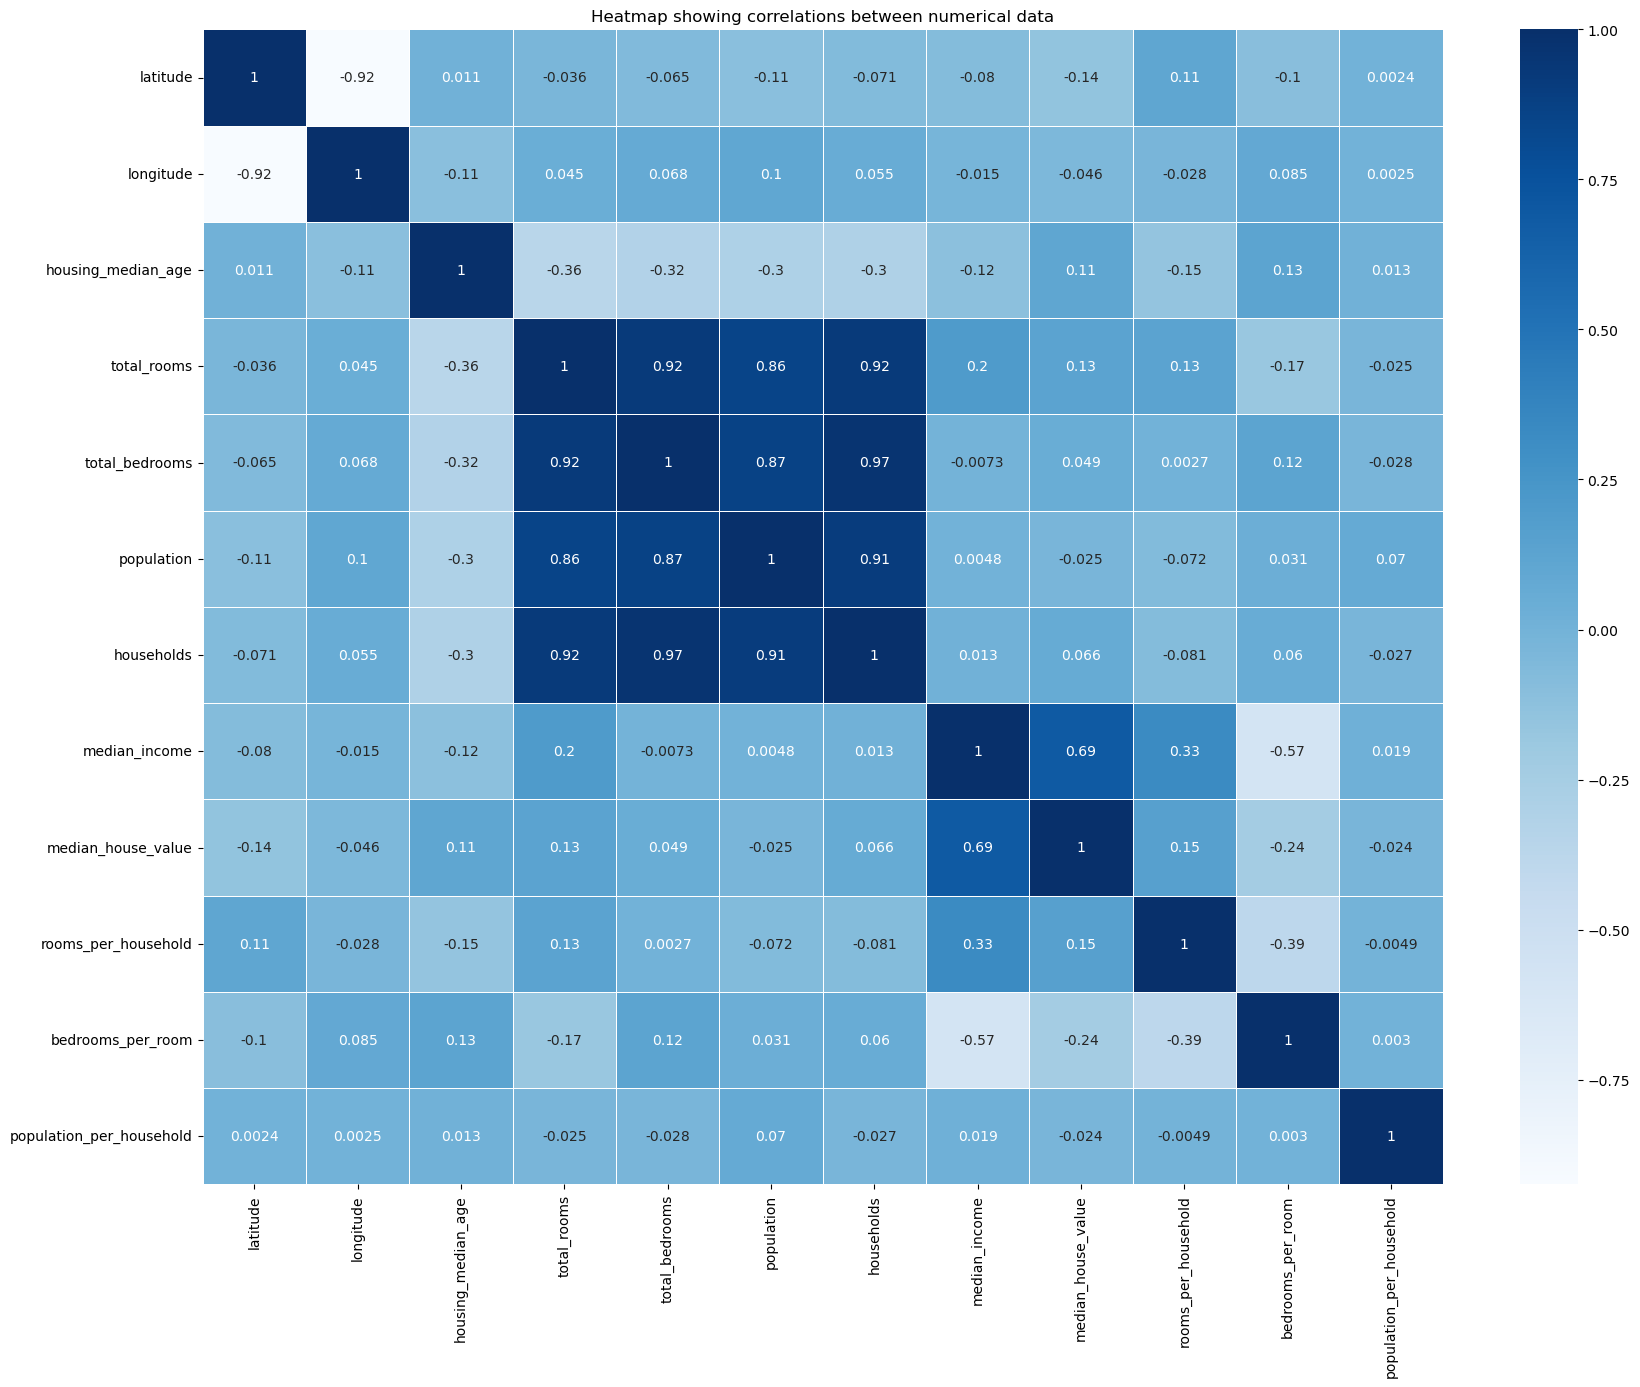

In [16]:
plt.figure(figsize=(20,15))  
sns.heatmap(df_filt_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

## What are the two features that have the biggest correlation in this dataset?

In [17]:
#total_bedrooms and households with 0.966507

In [18]:
#pd.options.display.max_rows = 4000
df_filt_numeric.corr().unstack().sort_values(ascending = False)

latitude             latitude               1.000000
longitude            longitude              1.000000
bedrooms_per_room    bedrooms_per_room      1.000000
rooms_per_household  rooms_per_household    1.000000
median_house_value   median_house_value     1.000000
                                              ...   
rooms_per_household  bedrooms_per_room     -0.387465
bedrooms_per_room    median_income         -0.573836
median_income        bedrooms_per_room     -0.573836
latitude             longitude             -0.924664
longitude            latitude              -0.924664
Length: 144, dtype: float64

# Make median_house_value binary
We need to turn the median_house_value variable from numeric into binary.
Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [19]:
df_filt_numeric['above_average'] = np.where(df_filt_numeric['median_house_value']>=df_filt_numeric['median_house_value'].mean(), 1, 0)
df_filt['above_average'] = np.where(df_filt_numeric['median_house_value']>=df_filt_numeric['median_house_value'].mean(), 1, 0)



# Question 3

Split the data
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
Make sure that the target value (median_house_value) is not in your dataframe.

In [20]:
from sklearn.model_selection import train_test_split
data_no_price = df_filt.drop('median_house_value', axis=1)

In [21]:
df_train_full, df_test = train_test_split(data_no_price, test_size=0.2, random_state=42)

In [22]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [23]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values


## Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
What is the value of mutual information?
Round it to 2 decimal digits using round(score, 2)

from sklearn.metrics import mutual_info_score

In [24]:
data_no_price.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'above_average'],
      dtype='object')

In [25]:
cat = ['ocean_proximity']


In [26]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

df_mi = df_train[cat].apply(calculate_mi)
score = df_mi.sort_values(ascending=False).to_frame(name='MI')

NameError: name 'mutual_info_score' is not defined

In [27]:
round(score, 2)

NameError: name 'score' is not defined

# Question 4
Now let's train a logistic regression
Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
Options:

0.60
0.72
0.84
0.95

In [28]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
train_dict = df_train[data_no_price.columns].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [30]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[data_no_price.columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)
print(accuracy_score(y_val, y_pred))

0.85
0.846656976744186


# Question 5
Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?
total_rooms
total_bedrooms
population
households

In [31]:
orig_score = accuracy
features = list(data_no_price.columns)
features.remove('above_average')
for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

latitude 0.02684108527131779 0.8231589147286822
longitude 0.038468992248061995 0.811531007751938
housing_median_age 0.052034883720930236 0.7979651162790697
total_rooms 0.01957364341085266 0.8304263565891473
total_bedrooms 0.023691860465116288 0.8263081395348837
population 0.02611434108527133 0.8238856589147286
households 0.020300387596899228 0.8296996124031008
median_income 0.09588178294573646 0.7541182170542635
ocean_proximity 0.05106589147286822 0.7989341085271318
rooms_per_household 0.04331395348837208 0.8066860465116279
bedrooms_per_room 0.04622093023255813 0.8037790697674418
population_per_household 0.02320736434108528 0.8267926356589147


In [32]:
#Answer is total_rooms.

# Question 6
For this question, we'll see how to use a linear regression model from Scikit-Learn
We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
If there are multiple options, select the smallest alpha.

Options:

0
0.01
0.1
1
10

In [33]:
df_filt['median_house_value']=np.log1p(df_filt['median_house_value'])

In [34]:
df_filt.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY,6.984127,0.146591,2.555556,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY,6.238137,0.155797,2.109842,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY,8.288136,0.129516,2.802260,1
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY,5.817352,0.184458,2.547945,1
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY,6.281853,0.172096,2.181467,1


In [35]:
df_train_full, df_test = train_test_split(df_filt, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [36]:
train_dict = df_train[list(df_train.columns)].to_dict(orient='records')

In [37]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[list(df_train.columns)].to_dict(orient='records')
X_val = dv.transform(val_dict)


In [38]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [39]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a,solver="sag",random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    print(score)
    print(a, round(score, 3))

0.523677755585077
0 0.524
0.5236777556030424
0.01 0.524
0.5236777557737005
0.1 0.524
0.5236777574892826
1 0.524
0.5236777746181411
10 0.524


In [ ]:
#Best option is alpha= 0 as we have the lowest rmse.